In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import plotly.express as px
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize

In [ ]:
dataset = pd.read_excel('/content/Terlaris Tokopedia April 2022.xlsx', header = 0)
dataset.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,LinkProduk,Hyperlink,NamaProduk,LinkToko,Hyperlink2,NamaToko,Harga,HargaAtas,OmsetMinimum,JumlahTerjual,...,Kategori1,Kategori2,Kategori3,KotaPengiriman,PenjualanSebelumnya,KenaikanPenjualan,PersentaseKenaikanPenjualan,ReviewSebelumnya,KenaikanReviewPenjualan,PersentaseKenaikanReview
0,https://www.tokopedia.com/dsgameshop/stik-stic...,Link Produk,stik / stick xbox kabel /wired xbox 360/pc ori...,https://www.tokopedia.com/dsgameshop,Link Toko,DSgameshop,102000,102000,497760000,4880,...,Gaming,Aksesoris Game Console,Adapter Game Console,Jakarta Barat,4878.0,2.0,0.041000,2023.0,1.0,0.049432
1,https://www.tokopedia.com/butikgames/vertical-...,Link Produk,Vertical Stand /Cooling fan / Charger PS4 Slim...,https://www.tokopedia.com/butikgames,Link Toko,Butikgames,200000,200000,285200000,1426,...,Gaming,Aksesoris Game Console,Adapter Game Console,Jakarta Pusat,1400.0,26.0,1.857143,840.0,13.0,1.547619
2,https://www.tokopedia.com/timuray/ac-adaptor-c...,Link Produk,AC Adaptor Charger Nintendo 3DS DSi XL 2DS NDS...,https://www.tokopedia.com/timuray,Link Toko,Timur Game Shop,28000,28000,66500000,2375,...,Gaming,Aksesoris Game Console,Adapter Game Console,Bekasi,2306.0,69.0,2.992194,922.0,14.0,1.518438
3,https://www.tokopedia.com/cellogame/kabel-nds-...,Link Produk,KABEL NDS LITE USB CASH CHARGER CHARGING DS LI...,https://www.tokopedia.com/cellogame,Link Toko,cello game,13000,13000,25610000,1970,...,Gaming,Aksesoris Game Console,Adapter Game Console,Tangerang Selatan,1876.0,94.0,5.010661,570.0,21.0,3.684211
4,https://www.tokopedia.com/timuray/kabel-cable-...,Link Produk,Kabel Cable AV RCA TW Playstation PS2 PS3,https://www.tokopedia.com/timuray,Link Toko,Timur Game Shop,8500,8500,35810500,4213,...,Gaming,Aksesoris Game Console,Adapter Game Console,Bekasi,4059.0,154.0,3.794038,768.0,34.0,4.427083


In [ ]:
def check_dataset(dataframe, head=5):
    print("## Shape ##")
    print(dataframe.shape)

    print("## Types ##")
    print(dataframe.dtypes)

    print("## Head ##")
    print(dataframe.head(head))

    print("##################### Tail #####################")
    print(dataframe.tail(head))

    print("##################### NA #####################")
    print(dataframe.isnull().sum())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
check_dataset(dataset)

## Shape ##
(16728, 23)
## Types ##
LinkProduk                      object
Hyperlink                       object
NamaProduk                      object
LinkToko                        object
Hyperlink2                      object
NamaToko                        object
Harga                            int64
HargaAtas                        int64
OmsetMinimum                     int64
JumlahTerjual                    int64
JumlahReview                     int64
JumlahRating                   float64
ValidOrder                     float64
Kategori1                       object
Kategori2                       object
Kategori3                       object
KotaPengiriman                  object
PenjualanSebelumnya            float64
KenaikanPenjualan              float64
PersentaseKenaikanPenjualan    float64
ReviewSebelumnya               float64
KenaikanReviewPenjualan        float64
PersentaseKenaikanReview       float64
dtype: object
## Head ##
                                          

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Memilih hanya kolom yang diinginkan
dataset = dataset[['KenaikanPenjualan', 'Kategori3', 'NamaProduk', 'KotaPengiriman','Harga','JumlahTerjual' ]]

# Menampilkan hasil seleksi
print(dataset)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


       KenaikanPenjualan             Kategori3  \
0                    2.0  Adapter Game Console   
1                   26.0  Adapter Game Console   
2                   69.0  Adapter Game Console   
3                   94.0  Adapter Game Console   
4                  154.0  Adapter Game Console   
...                  ...                   ...   
16723                0.0      Wedding Souvenir   
16724                0.0      Wedding Souvenir   
16725                0.0      Wedding Souvenir   
16726                0.0  Jasa Desain Undangan   
16727                0.0                   NaN   

                                              NamaProduk     KotaPengiriman  \
0      stik / stick xbox kabel /wired xbox 360/pc ori...      Jakarta Barat   
1      Vertical Stand /Cooling fan / Charger PS4 Slim...      Jakarta Pusat   
2      AC Adaptor Charger Nintendo 3DS DSi XL 2DS NDS...             Bekasi   
3      KABEL NDS LITE USB CASH CHARGER CHARGING DS LI...  Tangerang Selatan   
4   

In [ ]:
# Drop na values
dataset.dropna(inplace=True)
dataset=dataset[dataset.Kategori3 != 'Lainnya']
# Quantity and Price should be  greater than 0
dataset = dataset[dataset["KenaikanPenjualan"] > 0]
# We have to change the price column datatype as a numeric
dataset ['Harga'] = pd.to_numeric(dataset['Harga'], errors='coerce')
dataset = dataset[dataset["Harga"] > 0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-6-4f01bffd41b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.dropna(inplace=True)


In [ ]:
check_dataset(dataset)

## Shape ##
(12039, 6)
## Types ##
KenaikanPenjualan    float64
Kategori3             object
NamaProduk            object
KotaPengiriman        object
Harga                  int64
JumlahTerjual          int64
dtype: object
## Head ##
   KenaikanPenjualan             Kategori3  \
0                2.0  Adapter Game Console   
1               26.0  Adapter Game Console   
2               69.0  Adapter Game Console   
3               94.0  Adapter Game Console   
4              154.0  Adapter Game Console   

                                          NamaProduk     KotaPengiriman  \
0  stik / stick xbox kabel /wired xbox 360/pc ori...      Jakarta Barat   
1  Vertical Stand /Cooling fan / Charger PS4 Slim...      Jakarta Pusat   
2  AC Adaptor Charger Nintendo 3DS DSi XL 2DS NDS...             Bekasi   
3  KABEL NDS LITE USB CASH CHARGER CHARGING DS LI...  Tangerang Selatan   
4          Kabel Cable AV RCA TW Playstation PS2 PS3             Bekasi   

    Harga  JumlahTerjual  
0  102000  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
total_sales = dataset
total_sales["Total_Price"] = total_sales["Harga"] * total_sales["KenaikanPenjualan"]
#total_sales.columns
total_sales_per_customer = total_sales.groupby(["JumlahTerjual", "KotaPengiriman"]).agg({"Total_Price": "sum"})
total_sales_per_customer.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Total_Price
JumlahTerjual KotaPengiriman             
2             Kab. Tangerang    5500000.0
              Medan              176800.0
3             Depok              575500.0
              Jakarta Pusat     3156000.0
              Surabaya           100000.0
4             Depok              285000.0
              Jakarta Pusat      338300.0
              Jakarta Utara      150000.0
5             Bandung             60000.0
              Bekasi             405000.0

In [ ]:
total_sales_per_customer.reset_index(inplace=True)
total_sales_per_customer.sort_values(by = "Total_Price", ascending = False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,JumlahTerjual,KotaPengiriman,Total_Price
5333,2476,Jakarta Barat,4.065038e+09
2271,721,Depok,3.006000e+09
11031,139029,Jakarta Pusat,2.796915e+09
11135,411223,Jakarta Barat,2.056752e+09
4259,1699,Jakarta Pusat,1.858989e+09
5062,2261,Jakarta Pusat,1.417395e+09
4354,1753,Jakarta Utara,1.416360e+09
1050,317,Tangerang,1.219800e+09
10710,42170,Tangerang,1.145820e+09
11149,540596,Jakarta Barat,1.133548e+09


In [ ]:
# consider that for all time period
data_fig = total_sales_per_customer.sort_values(by = "Total_Price", ascending = False).head(70)

fig = px.scatter(data_fig, x="JumlahTerjual", y="Total_Price",
	         size="Total_Price", color="KotaPengiriman",
                 hover_name="KotaPengiriman", log_x=True, size_max=60, title="Top 100 Cities with the Largest Turnover")
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
total_barang = dataset
total_barang["Total_Price"] = total_barang["Harga"] * total_barang["KenaikanPenjualan"]
#total_sales.columns
total_per_barang = total_barang.groupby(["JumlahTerjual", "Kategori3"]).agg({"Total_Price": "sum"})
total_per_barang.head(10)

total_per_barang.reset_index(inplace=True)
total_per_barang.sort_values(by = "Total_Price", ascending = False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,JumlahTerjual,Kategori3,Total_Price
6013,2476,Laptop Consumer,4.060763e+09
2602,721,Mobil SUV & MPV,3.006000e+09
11863,139029,Voucher & Gift Card,2.796915e+09
11967,411223,Alat Diagnosa,2.056752e+09
4839,1699,Laptop Consumer,1.853589e+09
5716,2261,Laptop Consumer,1.417395e+09
4939,1753,iOS,1.416360e+09
1193,317,Tur Internasional,1.219800e+09
11542,42170,Susu Bayi di Atas 1 Tahun,1.145820e+09
11981,540596,Kaos Pria,1.133548e+09


In [ ]:
total_sales = dataset
total_sales["Total_Price"] = total_sales["Harga"] * total_sales["KenaikanPenjualan"]
#total_sales.columns
total_barang = total_sales.groupby(["JumlahTerjual", "Kategori3","KotaPengiriman"]).agg({"Total_Price": "sum"})
total_barang.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Total_Price
JumlahTerjual Kategori3         KotaPengiriman             
2             Perumahan Subsidi Medan              176800.0
              Villa             Kab. Tangerang    5500000.0
3             Hadiah Pernikahan Jakarta Pusat      580000.0
              Secondary Unit    Depok              575500.0
              Sewa Bus          Jakarta Pusat     2576000.0
                                Surabaya           100000.0
4             Secondary Unit    Jakarta Utara      150000.0
              Villa             Jakarta Pusat      338300.0
              Wifi Australia    Depok              285000.0
5             Secondary Unit    Bandung             60000.0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



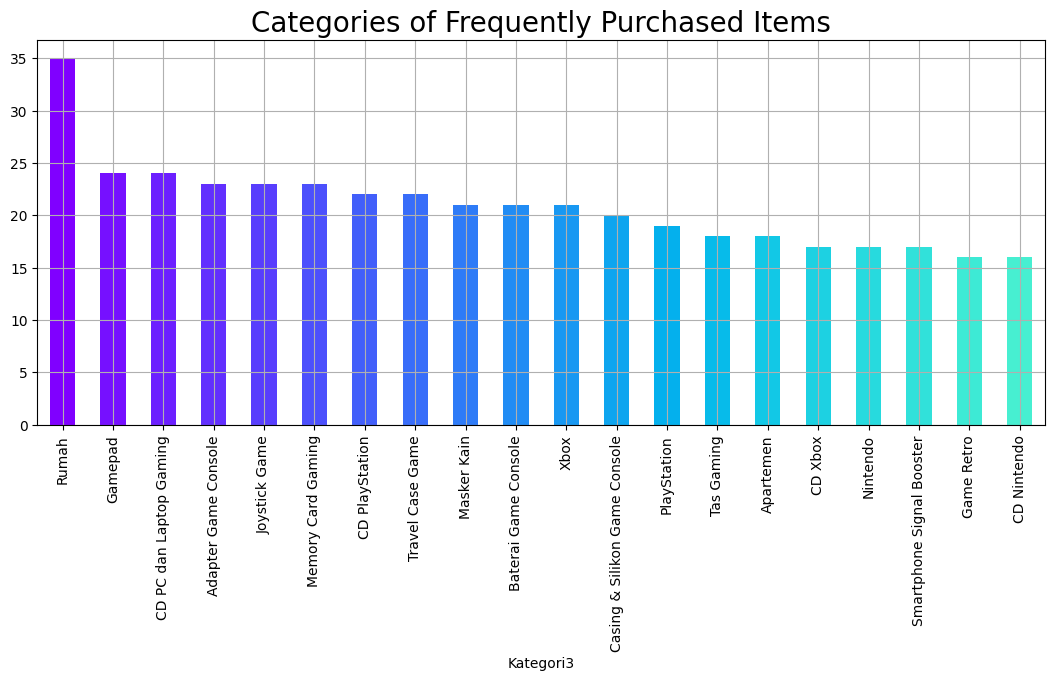

In [ ]:
import matplotlib.pyplot as plt

color = plt.cm.rainbow(np.linspace(0, 1, 50))
dataset["Kategori3"].value_counts().head(20).plot.bar(color = color, figsize=(13,5))
plt.title('Categories of Frequently Purchased Items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



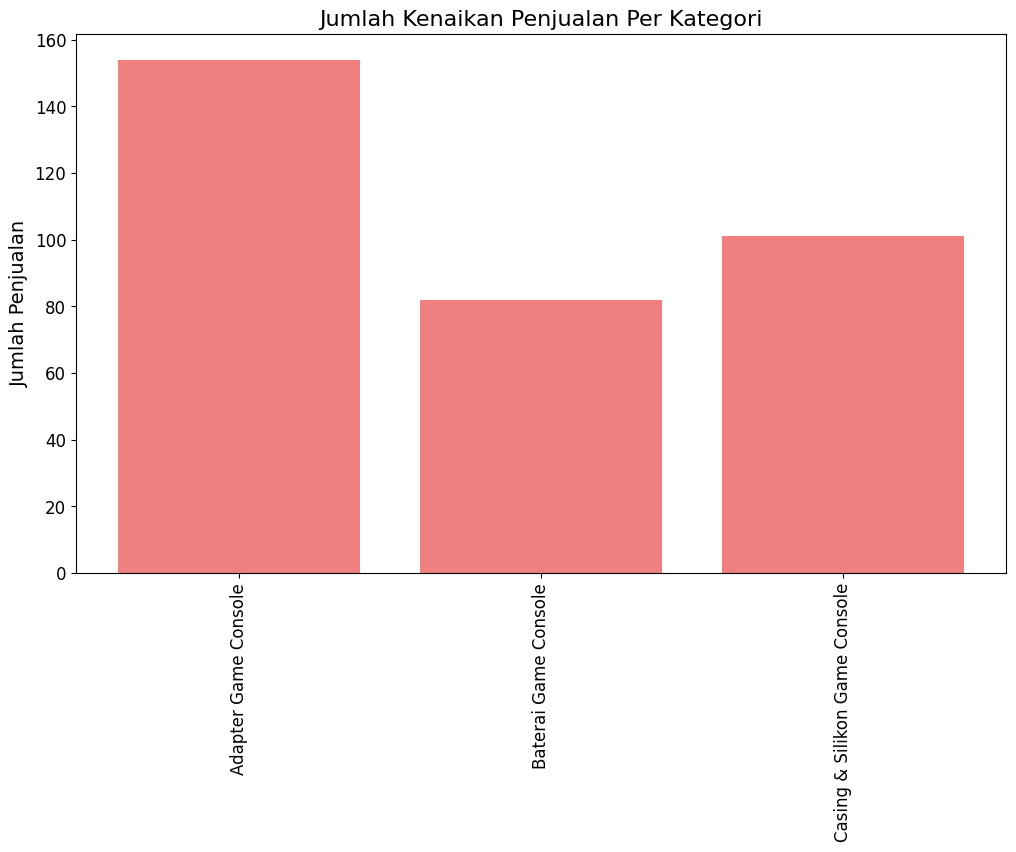

In [ ]:
prodi = dataset["Kategori3"].tolist()[:50]
jumlah_mhs = dataset["KenaikanPenjualan"].tolist()[:50]

plt.figure(figsize=(12,7))
plt.bar(prodi, jumlah_mhs, color='lightcoral')

plt.title('Jumlah Kenaikan Penjualan Per Kategori', size=16)
plt.ylabel('Jumlah Penjualan', size=14)
plt.xticks(rotation=90, size=12)
plt.yticks(size=12)

plt.show()


In [ ]:
user_id = dataset['KenaikanPenjualan'].unique()

CKategori3 = [list(dataset[dataset['KenaikanPenjualan'] == u].Kategori3) for u in user_id]

print(CKategori3[0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



['Adapter Game Console', 'Memory Card Gaming', 'Steering Wheel', 'Steering Wheel', 'Steering Wheel', 'Steering Wheel', 'Tas Gaming', 'Tas Gaming', 'Tas Gaming', 'Travel Case Game', 'Travel Case Game', 'Smartphone Signal Booster', 'CD PC dan Laptop Gaming', 'CD Xbox', 'Game Boy', 'Game Retro', 'Game Retro', 'Xbox', 'Tripod Handphone', 'Connection Kit', 'Keyboard Bluetooth', 'Tablet Sleeve', 'BlackBerry OS', 'BlackBerry OS', 'Windows Mobile', 'App Gift Card Fisik', 'Voucher Pulsa Fisik', 'Windows Mobile', 'Buku Desain Dapur', 'Buku Desain Kamar', 'Health Book Import', 'Health Book Import', 'Hobby & Interest Book Import', 'Psychology & Education Book Import', 'School Book Import', 'Secretarial Book Import', 'Buku Aktivitas', 'Buku Kesekretariatan', 'Buku Perbankan', 'Buku Perbankan', 'Buku Alam', 'Buku Hiburan', 'Buku Humor', 'Buku Olahraga', 'Kamus Bahasa Arab', 'Kamus Bahasa Korea', 'Busana', 'Buku Database', 'Buku Design Graphics', 'Majalah Design Interior', 'Novel Terjemahan', 'Buku S

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
# Instantiate transaction encoder.
encoder = TransactionEncoder()
# One-hot encode libraries.
onehot = encoder.fit(CKategori3).transform(CKategori3)

onehot = pd.DataFrame(onehot, columns = encoder.columns_)

# Print onehot header.
onehot.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Motherboard,3D Puzzle,AC Portable,AC Reflektor,AC Standing,Abaya,Abon,Abs Roller,Access Control Door,Action Camera,...,Yoga Mat,Yogurt,Yukata Pria,Yukata Wanita,benang dan tusuk gigi,eyeshadow,gasing,iOS,microSD Card,miniSD Card
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets3 = apriori(onehot,
                            min_support = 0.005,
                            #max_len = 1,
                            use_colnames = True)

# Print a preview of the frequent itemsets
frequent_itemsets3.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,support,itemsets
0,0.013115,(Adapter Game Console)
1,0.005902,(Aerator)
2,0.005246,(Agenda & Planner)
3,0.005246,(Aksesoris Aquarium)
4,0.005246,(Alas Kandang Hewan)
5,0.005246,(Alat Bantu Pendengaran)
6,0.005246,(Album Foto)
7,0.007213,(Apartemen)
8,0.005246,(App Gift Card Fisik)
9,0.005902,(Art Knife)


In [ ]:
# Mengganti threshold support sesuai kebutuhan Anda, sebagai contoh, kita gunakan 0.01
high_support_threshold = 0.005

# Filter frequent itemsets yang memiliki support di atas threshold
high_support_itemsets = frequent_itemsets3[frequent_itemsets3['support'] >= high_support_threshold]

# Menampilkan frequent itemsets dengan support tinggi
print(high_support_itemsets)


      support                        itemsets
0    0.013115          (Adapter Game Console)
1    0.005902                       (Aerator)
2    0.005246              (Agenda & Planner)
3    0.005246            (Aksesoris Aquarium)
4    0.005246            (Alas Kandang Hewan)
..        ...                             ...
209  0.005246  (Game Retro, Travel Case Game)
210  0.005246              (Game Retro, Xbox)
211  0.005902       (Rumah, Travel Case Game)
212  0.006557                   (Rumah, Xbox)
213  0.005246        (Travel Case Game, Xbox)

[214 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#frequent_itemsets3 =apriori(onehot, min_support=0.005, use_colnames=True)
# Recover the association rules
rules = association_rules(frequent_itemsets3 ,metric = 'confidence',
                          min_threshold = 0.001)

rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         32 non-null     object 
 1   consequents         32 non-null     object 
 2   antecedent support  32 non-null     float64
 3   consequent support  32 non-null     float64
 4   support             32 non-null     float64
 5   confidence          32 non-null     float64
 6   lift                32 non-null     float64
 7   leverage            32 non-null     float64
 8   conviction          32 non-null     float64
 9   zhangs_metric       32 non-null     float64
dtypes: float64(8), object(2)
memory usage: 2.6+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Filter frequent itemsets yang memiliki support di atas threshold dan hanya memiliki pasangan
pair_itemsets = frequent_itemsets3[(frequent_itemsets3['support'] >= high_support_threshold) & (frequent_itemsets3['itemsets'].apply(lambda x: len(x) == 2))]

# Mengurutkan nilai pasangan dari yang tertinggi
sorted_pair_itemsets = pair_itemsets.sort_values(by='support', ascending=False)

# Munculkan nilai support yang hanya memiliki pasangan dan diurutkan dari yang tertinggi
print(sorted_pair_itemsets)

      support                                           itemsets
212  0.006557                                      (Rumah, Xbox)
201  0.005902                    (CD PC dan Laptop Gaming, Xbox)
211  0.005902                          (Rumah, Travel Case Game)
198  0.005246                      (Rumah, Baterai Game Console)
199  0.005246              (CD PC dan Laptop Gaming, Game Retro)
200  0.005246              (CD PC dan Laptop Gaming, Sewa Mobil)
202  0.005246                            (CD PlayStation, Rumah)
203  0.005246                 (CD PlayStation, Travel Case Game)
204  0.005246             (Casing & Silikon Game Console, Rumah)
205  0.005246  (Casing & Silikon Game Console, Travel Case Game)
206  0.005246              (Casing & Silikon Game Console, Xbox)
207  0.005246                         (Game Boy, Steering Wheel)
208  0.005246                                (Game Retro, Rumah)
209  0.005246                     (Game Retro, Travel Case Game)
210  0.005246            

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Rumah),(Baterai Game Console),0.014426,0.009836,0.005246,0.363636,36.969697,0.005104,1.555972,0.987192
1,(Baterai Game Console),(Rumah),0.009836,0.014426,0.005246,0.533333,36.969697,0.005104,2.111944,0.982616
2,(CD PC dan Laptop Gaming),(Game Retro),0.013770,0.008525,0.005246,0.380952,44.688645,0.005129,1.601614,0.991273
3,(Game Retro),(CD PC dan Laptop Gaming),0.008525,0.013770,0.005246,0.615385,44.688645,0.005129,2.564197,0.986028
4,(CD PC dan Laptop Gaming),(Sewa Mobil),0.013770,0.006557,0.005246,0.380952,58.095238,0.005156,1.604792,0.996509
5,(Sewa Mobil),(CD PC dan Laptop Gaming),0.006557,0.013770,0.005246,0.800000,58.095238,0.005156,4.931148,0.989274
6,(CD PC dan Laptop Gaming),(Xbox),0.013770,0.010492,0.005902,0.428571,40.848214,0.005757,1.731639,0.989140
7,(Xbox),(CD PC dan Laptop Gaming),0.010492,0.013770,0.005902,0.562500,40.848214,0.005757,2.254239,0.985863
8,(CD PlayStation),(Rumah),0.011148,0.014426,0.005246,0.470588,32.620321,0.005085,1.861639,0.980272
9,(Rumah),(CD PlayStation),0.014426,0.011148,0.005246,0.363636,32.620321,0.005085,1.553911,0.983533


In [ ]:
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



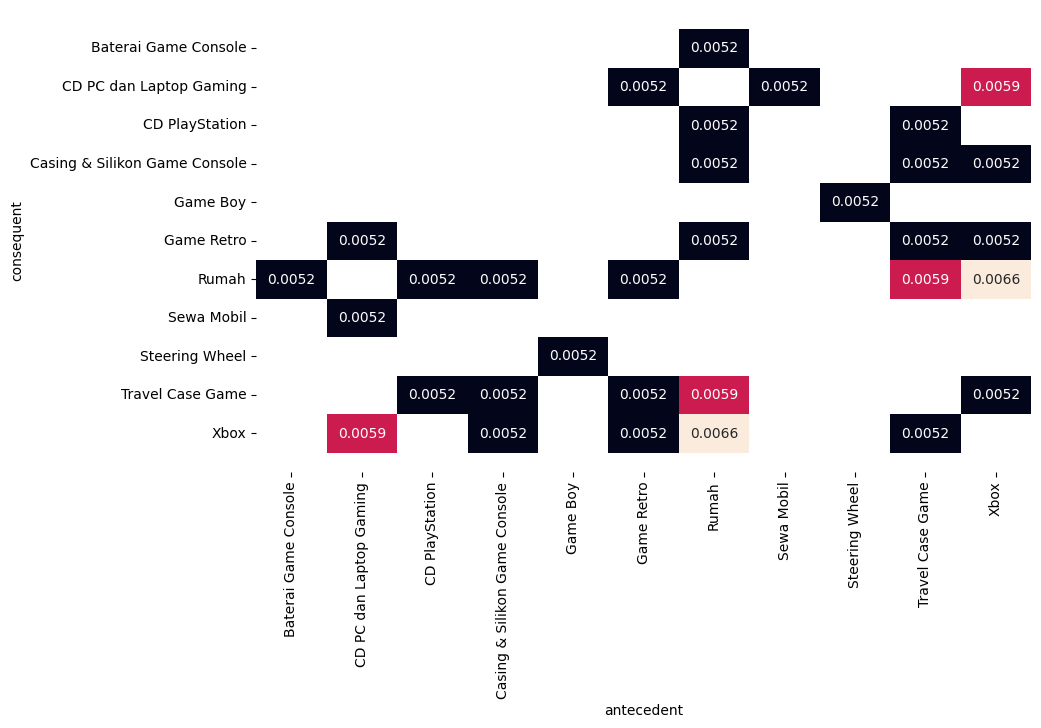

In [ ]:
import seaborn as sns

rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: ', '.join(list(antecedent)))
rules['consequent'] = rules['consequents'].apply(lambda consequent: ', '.join(list(consequent)))

# Transform antecedent, consequent, and support columns into matrix
support_table = rules.pivot(index='consequent', columns='antecedent', values='support')

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(support_table, annot=True, cbar=False)

# Limit
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)

plt.yticks(rotation=0)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



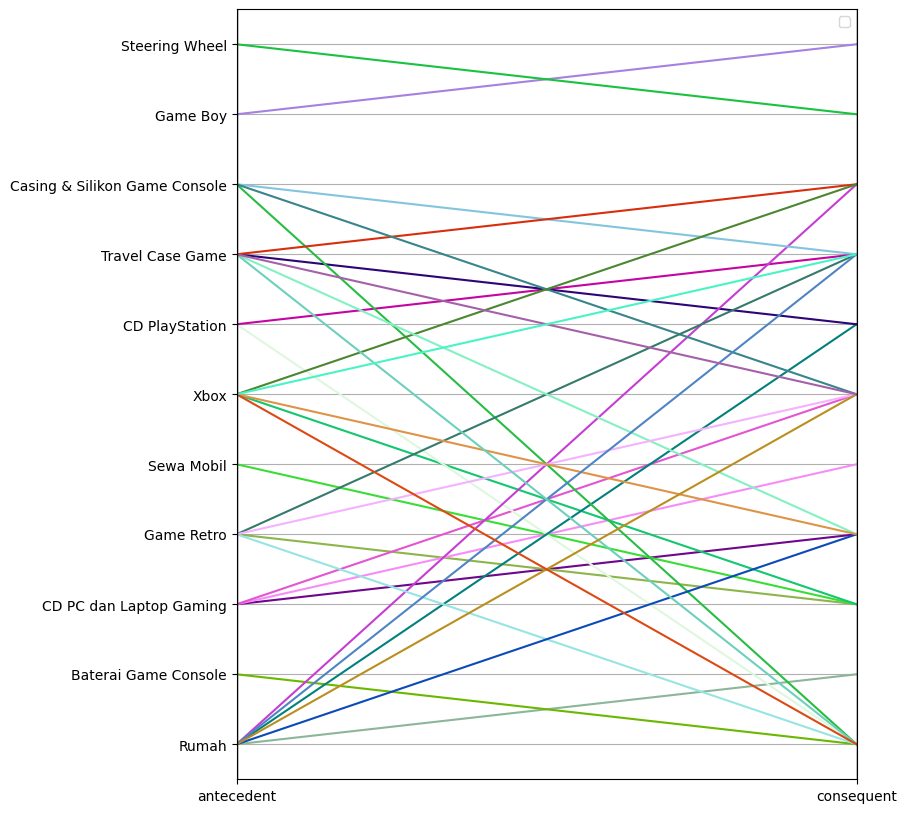

In [ ]:
from pandas.plotting import parallel_coordinates

# Compute the frequent itemsets
frequent_itemsets3

# Compute rules from the frequent itemsets
rules


# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(rules)

# Generate parallel coordinates plot
plt.figure(figsize=(8,10))
parallel_coordinates(coords, 'rule')
plt.legend([])
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



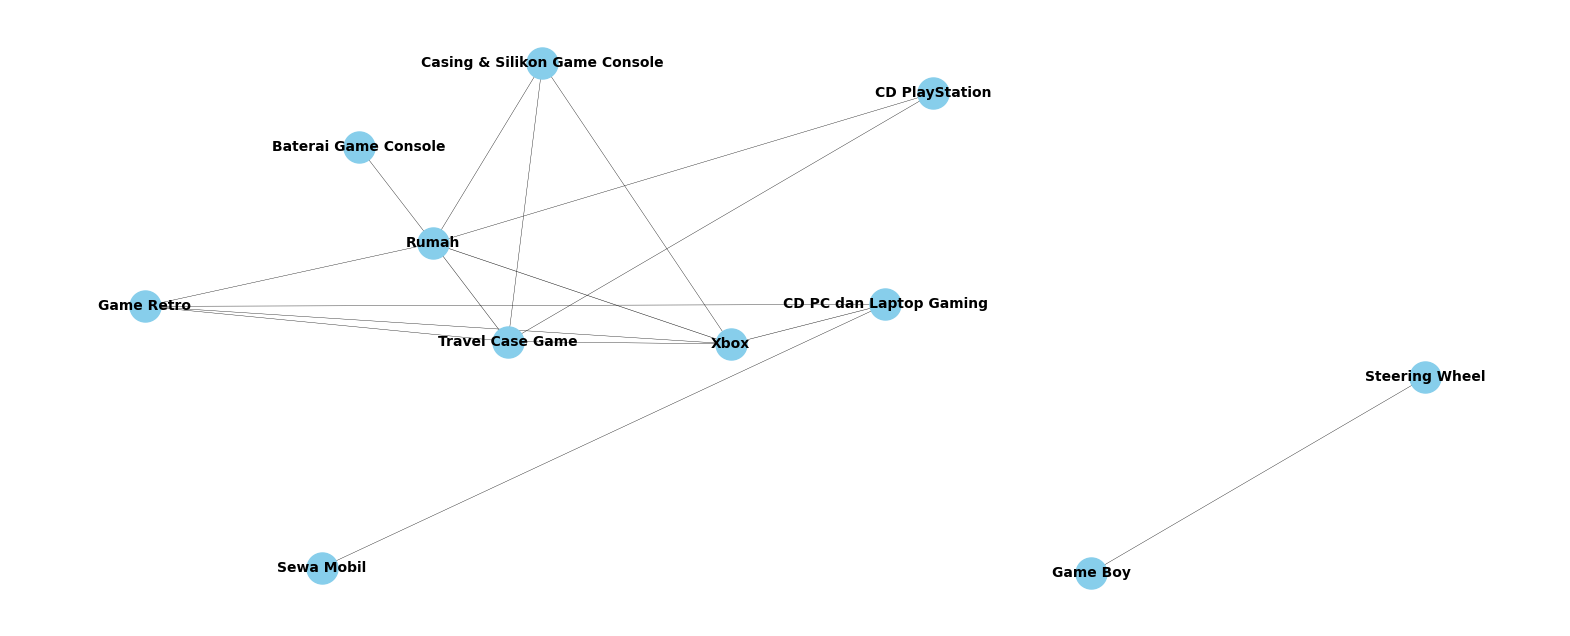

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Buat graf kosong
G = nx.Graph()

# Tambahkan edge sesuai aturan asosiasi
for _, row in rules.iterrows():
    G.add_edge(row['antecedent'], row['consequent'], weight=row['support'])

# Atur posisi node menggunakan spring layout
pos = nx.spring_layout(G)

# Gambar graf dengan label node dan lebar edge berdasarkan weight
fig, ax = plt.subplots(figsize=(20, 8))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', width=[d['weight']*50 for (u, v, d) in G.edges(data=True)], ax=ax)

# Tampilkan graf
plt.show()

## Get Dataset based on Assotiation Rulesssss

In [ ]:
# Sorting aturan berdasarkan confidence secara descending
sorted_rules = rules.sort_values(by='confidence', ascending=False).reset_index(drop=True)

ui_labels = {}
for index, row in sorted_rules.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequent = list(row['consequents'])[0]

    # Buat Label 'UI{index + 1}' dan menambahkan kata kunci
    ui_label = f'UI{index + 1}'
    ui_labels[ui_label] = {
        'Antecedent': antecedent,
        'Consequent': consequent,
    }

ui_labels_tabulated = pd.DataFrame.from_dict(ui_labels, orient='index')
print(ui_labels_tabulated)

# Kalo mau nampilin dalam format dictionary
# for ui_label, data in ui_labels.items():
#     print(f"'{ui_label}': {data},")


                         Antecedent                     Consequent
UI1                  Steering Wheel                       Game Boy
UI2                      Sewa Mobil        CD PC dan Laptop Gaming
UI3                        Game Boy                 Steering Wheel
UI4                            Xbox                          Rumah
UI5                      Game Retro                           Xbox
UI6                      Game Retro                          Rumah
UI7                      Game Retro        CD PC dan Laptop Gaming
UI8                      Game Retro               Travel Case Game
UI9                Travel Case Game                          Rumah
UI10                           Xbox        CD PC dan Laptop Gaming
UI11               Travel Case Game                 CD PlayStation
UI12           Baterai Game Console                          Rumah
UI13               Travel Case Game  Casing & Silikon Game Console
UI14               Travel Case Game                     Game R

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Mengumpulkan NamaProduk berdasarkan Kategori3
# Pengelompokan Produk berdasarkan Class/Label UI
product_groups = {}
for ui_label, categories in ui_labels.items():
    antecedent_category = categories['Antecedent']
    consequent_category = categories['Consequent']

    # Filter produk berdasarkan Kategori3
    antecedent_products = dataset[dataset['Kategori3'] == antecedent_category]['NamaProduk'].tolist()
    consequent_products = dataset[dataset['Kategori3'] == consequent_category]['NamaProduk'].tolist()

    all_products = antecedent_products + consequent_products

    product_groups[ui_label] = all_products

for ui_label, products in product_groups.items():
    print(f"'{ui_label}': {products},")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



'UI1': ['Cengkeh Klinting 10pcs', 'Racing Steering Wheel Wiimote For Remote Nintendo Wii Mario Kart - Putih', 'NINTENDO SWITCH STEERING WHEEL RED AND BLUE DOBE 2PCS PACK', 'LOGITECH G29 DRIVING WHEEL + SHIFTER LOGITECH FOR PS4/PS3/PC', 'Steering wheel stir game Ets2 pc simulator - Hitam', 'Logitech Driving Force G29 Racing Wheel PS3 PS4 Playstation 3 4 - Free Thumbler', 'Flexi GameSeat Advance', 'PXN-V9 Steering Wheel With Clutch Shifter Alternatif Logitech G29', 'Logitech G29 Driving Force Racing Wheel - Logitech G29', 'LOGITECH G29 DRIVING WHEEL Steering Wheel PS4/PS3/PC', 'Pxn V3Ii Racing Steering Wheel | Stir | Setir Ps Ps3 Ps4 Pc Xbox', 'DIY Handbrake Logitech G29, G27, G25 Thrustmaster', 'PXN V9 Gaming Steering Wheel 900° Degree', 'Logitech G Driving Force Shifter For G29 And G920 Steering Wheel', 'Pxn V3Ii Racing Steering Wheel | Stir | Setir Ps3 Ps4 Pc Xbox Switch - Orange', 'Logitech G920 & G29 Driving Force Steering Wheel & Pedals For PS4', 'Gameboy Gamebox Gamebot Sup Plus 4

## Products Distribution in each UI (Class/Label)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



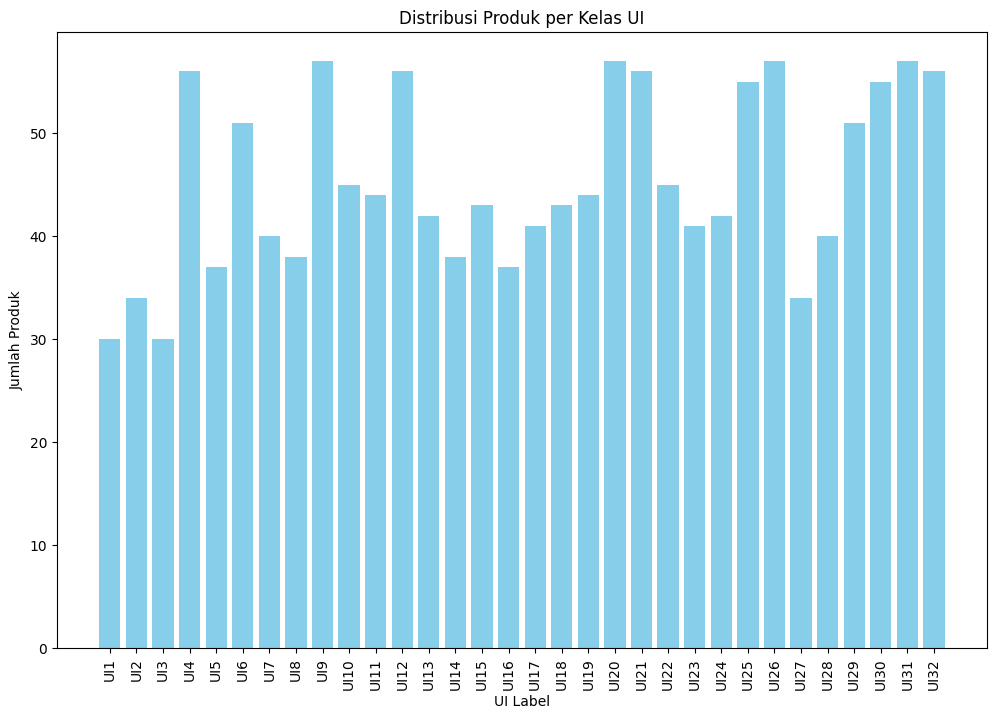

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

product_count = {ui_label: len(products) for ui_label, products in product_groups.items()}

product_count_df = pd.DataFrame(list(product_count.items()), columns=['UI_Label', 'Product_Count'])

plt.figure(figsize=(12, 8))
plt.bar(product_count_df['UI_Label'], product_count_df['Product_Count'], color='skyblue')
plt.xlabel('UI Label')
plt.ylabel('Jumlah Produk')
plt.title('Distribusi Produk per Kelas UI')
plt.xticks(rotation=90)
plt.show()

## Proportion of product categories in each UI (Label/Class)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



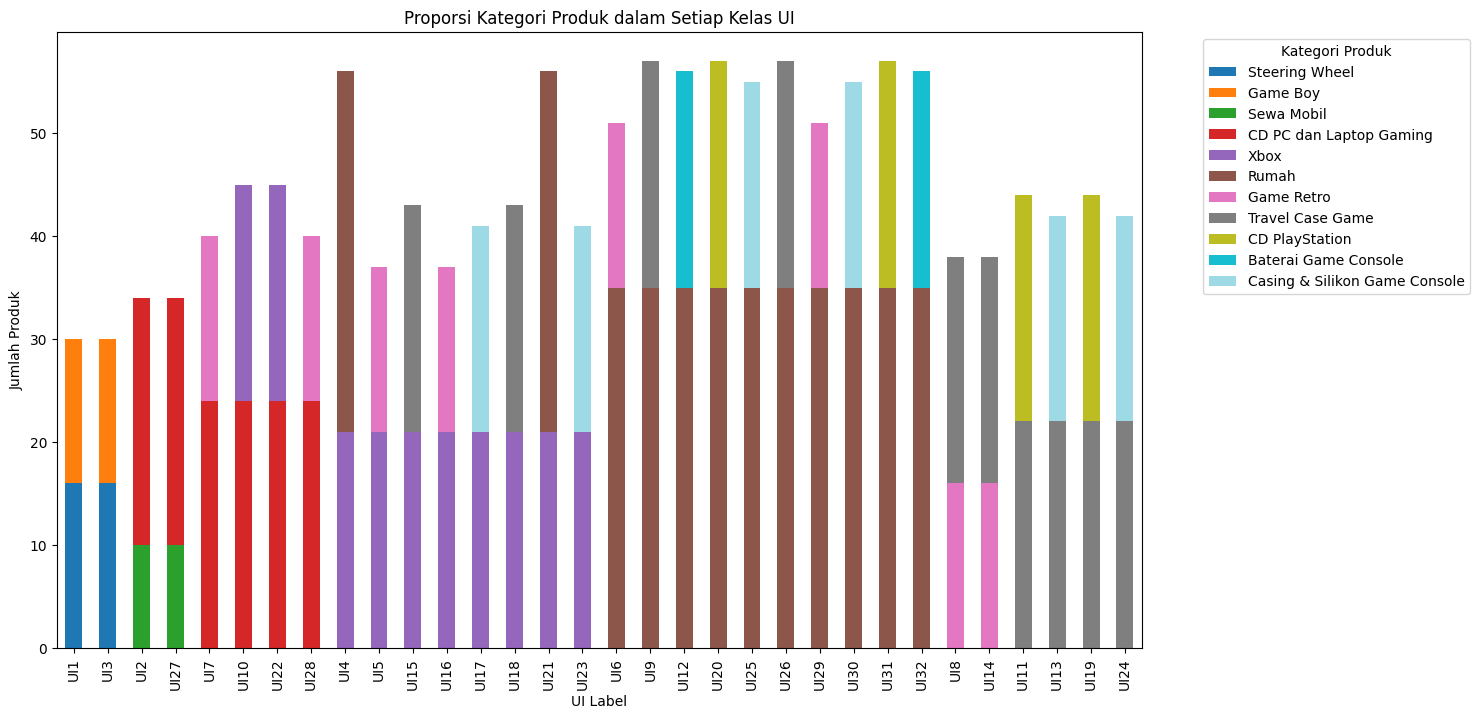

In [ ]:
category_count = {ui_label: Counter([dataset[dataset['NamaProduk'] == product]['Kategori3'].values[0] for product in products]) for ui_label, products in product_groups.items()}

category_df = pd.DataFrame.from_dict(category_count, orient='index').fillna(0)

category_df.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.xlabel('UI Label')
plt.ylabel('Jumlah Produk')
plt.title('Proporsi Kategori Produk dalam Setiap Kelas UI')
plt.legend(title='Kategori Produk', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

## 20 most frequently appearing products

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



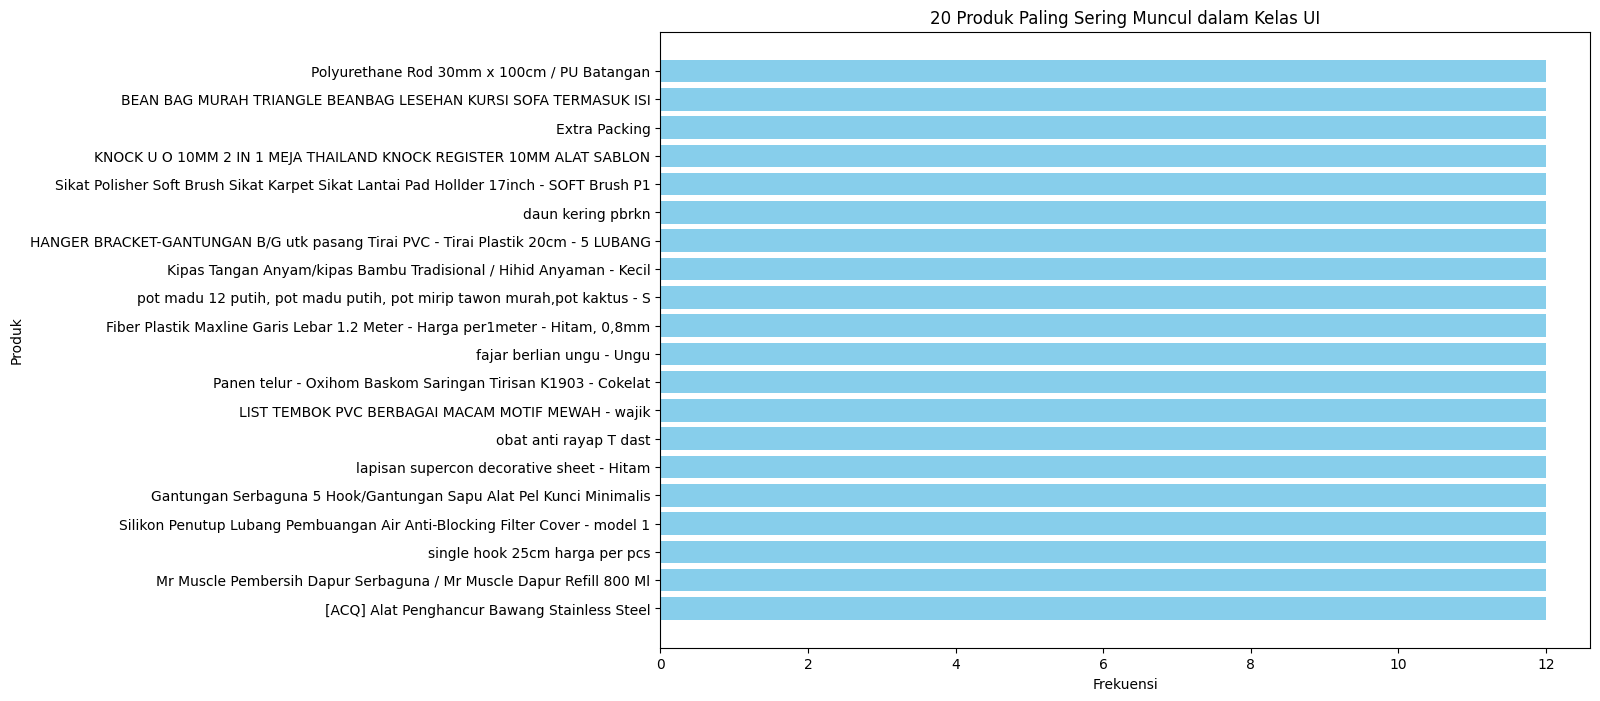

In [ ]:
# Hitung frekuensi kemunculan setiap produk di semua kelas UI
all_products = [product for products in product_groups.values() for product in products]
product_frequency = Counter(all_products)

product_frequency_df = pd.DataFrame(product_frequency.items(), columns=['Product', 'Frequency']).sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(product_frequency_df['Product'].head(20), product_frequency_df['Frequency'].head(20), color='skyblue')
plt.xlabel('Frekuensi')
plt.ylabel('Produk')
plt.title('20 Produk Paling Sering Muncul dalam Kelas UI')
plt.gca().invert_yaxis()
plt.show()

## Data Preparation

In [ ]:
df = pd.DataFrame([(key, prod) for key, values in product_groups.items() for prod in values], columns=['Class', 'Product'])

print(df)

     Class                                            Product
0      UI1                             Cengkeh Klinting 10pcs
1      UI1  Racing Steering Wheel Wiimote For Remote Ninte...
2      UI1  NINTENDO SWITCH STEERING WHEEL RED AND BLUE DO...
3      UI1  LOGITECH G29 DRIVING WHEEL + SHIFTER LOGITECH ...
4      UI1  Steering wheel stir game Ets2 pc simulator - H...
...    ...                                                ...
1447  UI32  Replacement Original 3DS XL Battery Original 3...
1448  UI32  BATRE PSP FAT OP / BATTERY PSP FAT/TEBAL SERI ...
1449  UI32                         BATERAI PSP SLIM 2000 3000
1450  UI32    BATRE STIK PS4 ORI / BATTERY STIK PS4 ORI - ORI
1451  UI32       Batere/Baterai/Battere PSP Slim 2000/3000 Kw

[1452 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Cleaning and Normalisasi Teks

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')

stop_words = set(stopwords.words('indonesian'))
stemmer = PorterStemmer()

def clean_text(text):
    # lowercasing
    text = text.lower()
    # Menghapus special char dan angka
    text = re.sub(f"[{re.escape(string.punctuation)}0-9]", " ", text)
    # Menghapus spasi berlebih
    text = re.sub(r"\s+", " ", text).strip()
    # Menghapus stop words
    text = " ".join([word for word in text.split() if word not in stop_words])
    # Stemming
    text = " ".join([stemmer.stem(word) for word in text.split()])
    return text

# Cleaning dan Normalisasi Product
df['CleanedProduct'] = df['Product'].apply(clean_text)

# Delete duplikasi
df.drop_duplicates(subset=['CleanedProduct'], keep='first', inplace=True)

# Mengisi nilai kosong (jika ada)
df['CleanedProduct'].fillna('', inplace=True)

print(df)
# print(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


    Class                                            Product  \
0     UI1                             Cengkeh Klinting 10pcs   
1     UI1  Racing Steering Wheel Wiimote For Remote Ninte...   
2     UI1  NINTENDO SWITCH STEERING WHEEL RED AND BLUE DO...   
3     UI1  LOGITECH G29 DRIVING WHEEL + SHIFTER LOGITECH ...   
4     UI1  Steering wheel stir game Ets2 pc simulator - H...   
..    ...                                                ...   
555  UI13  Nintendo Switch Nyko Thin Case Color Grey Tran...   
556  UI13  Memo FL01 Pendingin HP / Cooler HP / Cooling H...   
557  UI13  NYKO Nintendo Switch Thin Case color Clear -63...   
558  UI13  [Sound Fox] Nintendo Switch Lite TPU Case Prot...   
559  UI13  Original Memo Finger Sleeve PUBG FF ML CODM Sa...   

                                        CleanedProduct  Cluster  
0                                     cengkeh klint pc        1  
1    race steer wheel wiimot for remot nintendo wii...        1  
2    nintendo switch steer wheel 

## Feature Extraction using TF-IDF



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Menggunakan TF-IDF untuk ekstraksi fitur dari nama produk
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['CleanedProduct'])
y = df['Class']

feature_names = vectorizer.get_feature_names_out()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Training using SVM



### Splitting n Hyperparameter Tuning

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

grid = GridSearchCV(SVC(probability=True), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

print(grid.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END ....................C=0.01, gamma=10, kernel=linear; total time=   0.1s
[CV] END ....................C=0.01, gamma=10, kernel=linear; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[CV] END ....................C=0.01, gamma=10, kernel=linear; total time=   0.0s
[CV] END ....................C=0.01, gamma=10, kernel=linear; total time=   0.1s
[CV] END ....................C=0.01, gamma=10, kernel=linear; total time=   0.0s
[CV] END ......................C=0.01, gamma=10, kernel=poly; total time=   0.0s
[CV] END ......................C=0.01, gamma=10, kernel=poly; total time=   0.1s
[CV] END ......................C=0.01, gamma=10, kernel=poly; total time=   0.1s
[CV] END ......................C=0.01, gamma=10, kernel=poly; total time=   0.0s
[CV] END ......................C=0.01, gamma=10, kernel=poly; total time=   0.0s
[CV] END .......................C=0.01, gamma=10, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.01, gamma=10, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.01, gamma=10, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.01, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ...................

### Training SVM

In [ ]:
svm_model = grid.best_estimator_

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Classification SVM Report:')
print(classification_report(y_test, y_pred))

Classification SVM Report:
              precision    recall  f1-score   support

         UI1       1.00      0.80      0.89         5
        UI11       1.00      0.50      0.67         4
        UI12       1.00      0.83      0.91         6
        UI13       1.00      0.50      0.67         4
         UI2       1.00      1.00      1.00         3
         UI4       0.67      1.00      0.80        14
         UI5       1.00      0.50      0.67         2
         UI8       1.00      1.00      1.00         6

    accuracy                           0.84        44
   macro avg       0.96      0.77      0.82        44
weighted avg       0.89      0.84      0.84        44



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Accuracy Score Training n Testing


In [ ]:
train_accuracy = accuracy_score(y_train, svm_model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.98
Testing Accuracy: 0.84


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Testingg Prediction 🔥🔥

### Product Recommendation based on Highest Probability

In [ ]:
# Rekomendasi produk berdasarkan input pengguna
def recommend_products(user_input):
    user_input_transformed = vectorizer.transform([user_input])
    predicted_probabilities = svm_model.predict_proba(user_input_transformed)
    class_index = predicted_probabilities.argmax()
    predicted_class = svm_model.classes_[class_index]
    recommended_products = df[df['Class'] == predicted_class]['Product'].tolist()

    print(f"Input: {user_input}")
    print(f"Kelas: {predicted_class}")
    print(f"Probabilitas: {predicted_probabilities[0][class_index]:.2f}")
    print("Rekomendasi Produk:")
    for product in recommended_products:
        print(f"- {product}")


user_input = input("Masukan nama produk atau kata kunci: ")
recommend_products(user_input)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Masukan nama produk atau kata kunci: game
Input: game
Kelas: UI1
Probabilitas: 0.68
Rekomendasi Produk:
- Cengkeh Klinting 10pcs
- Racing Steering Wheel Wiimote For Remote Nintendo Wii Mario Kart - Putih
- NINTENDO SWITCH STEERING WHEEL RED AND BLUE DOBE 2PCS PACK
- LOGITECH G29 DRIVING WHEEL + SHIFTER LOGITECH FOR PS4/PS3/PC
- Steering wheel stir game Ets2 pc simulator - Hitam
- Logitech Driving Force G29 Racing Wheel PS3 PS4 Playstation 3 4 - Free Thumbler
- Flexi GameSeat Advance
- PXN-V9 Steering Wheel With Clutch Shifter Alternatif Logitech G29
- Logitech G29 Driving Force Racing Wheel - Logitech G29
- LOGITECH G29 DRIVING WHEEL Steering Wheel PS4/PS3/PC
- Pxn V3Ii Racing Steering Wheel | Stir | Setir Ps Ps3 Ps4 Pc Xbox
- DIY Handbrake Logitech G29, G27, G25 Thrustmaster
- PXN V9 Gaming Steering Wheel 900° Degree
- Logitech G Driving Force Shifter For G29 And G920 Steering Wheel
- Pxn V3Ii Racing Steering Wheel | Stir | Setir Ps3 Ps4 Pc Xbox Switch - Orange
- Logitech G920 & G29 D

### Product Recommendation based on Highest Probability V2

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_products(user_input):
    user_input_cleaned = clean_text(user_input)
    user_input_transformed = vectorizer.transform([user_input_cleaned])
    predicted_probabilities = svm_model.predict_proba(user_input_transformed)
    class_index = predicted_probabilities.argmax()
    predicted_class = svm_model.classes_[class_index]

    class_products = df[df['Class'] == predicted_class]
    class_products_transformed = vectorizer.transform(class_products['CleanedProduct'])

    similarities = cosine_similarity(user_input_transformed, class_products_transformed).flatten()
    class_products['Similarity'] = similarities

    sorted_products = class_products.sort_values(by='Similarity', ascending=False)

    print(f"Input: {user_input}")
    print(f"Kelas: {predicted_class}")
    print(f"Probabilitas: {predicted_probabilities[0][class_index]:.2f}")
    print("Rekomendasi Produk:")
    for product in sorted_products['Product'].tolist():
        print(f"- {product}")

user_input = input("Masukan nama produk atau kata kunci: ")
recommend_products(user_input)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Masukan nama produk atau kata kunci: game
Input: game
Kelas: UI1
Probabilitas: 0.68
Rekomendasi Produk:
- game /game boy/psp/pvp dw 058
- GAME BOY NINTENDO PVP 3 CONSOLE GAME - Orange
- MAINAN GAMEBOT GAME BOT BRICK GAME TETRIS 9999 IN 1 JADUL - Hijau
- 2in1 GAME BOY SEGA 400in1 Games 8 BIT SUP GameBoy Mini HOT GAMESIR - Kuning, gameboy stick
- PXN V9 Gaming Steering Wheel 900° Degree
- Mobile power game box 2in1 - Putih
- game portable/gameboy psd jv 808
- Steering wheel stir game Ets2 pc simulator - Hitam
- USB Flashdisk 32gb Full Games Nintendo Wii Flashdisc
- Gameboy Advance Classic Mobile Power Permainan Jadul Isi 416 Games
- Mainan anak // PVP DW-999 // game boy // nitendo //edukasi6kaset
- 2in1 GAME BOY SEGA 400 IN 1 8 BIT SUP GameBoy Mini HOT Item - Hitam
- Gameboy Gamebox Gamebot Sup Plus 400 in 1 / Game Box Boy Bot Sup Plus - Hitam
- Stick Gameboy Sup Stick Game Box Sup Stick Tambahan Stick Cadangan - Hitam
- CROFFLE BOY 30ML - NIC6MG
- GameBoy PVP 2 DW-01 (SEGA) 128bit // ma

<ipython-input-38-522e8dfafbd4>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Class Recommendation based on Probability

In [ ]:
def recommend_classes(user_input):
    user_input_cleaned = clean_text(user_input)
    user_input_transformed = vectorizer.transform([user_input_cleaned])
    predicted_probabilities = svm_model.predict_proba(user_input_transformed)
    class_probabilities = sorted(zip(svm_model.classes_, predicted_probabilities[0]), key=lambda x: x[1], reverse=True)

    print(f"Input: {user_input}")
    print("Rekomendasi kelas berdasarkan probabilitas:")
    for class_label, probability in class_probabilities:
        print(f"- Kelas: {class_label} dengan Probabilitas: {probability:.2f}")

user_input = input("Masukan nama produk atau kata kunci: ")
recommend_classes(user_input)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Masukan nama produk atau kata kunci: game
Input: game
Rekomendasi kelas berdasarkan probabilitas:
- Kelas: UI1 dengan Probabilitas: 0.68
- Kelas: UI5 dengan Probabilitas: 0.26
- Kelas: UI2 dengan Probabilitas: 0.02
- Kelas: UI13 dengan Probabilitas: 0.01
- Kelas: UI11 dengan Probabilitas: 0.01
- Kelas: UI8 dengan Probabilitas: 0.01
- Kelas: UI12 dengan Probabilitas: 0.01
- Kelas: UI4 dengan Probabilitas: 0.01


### Learning Curves

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



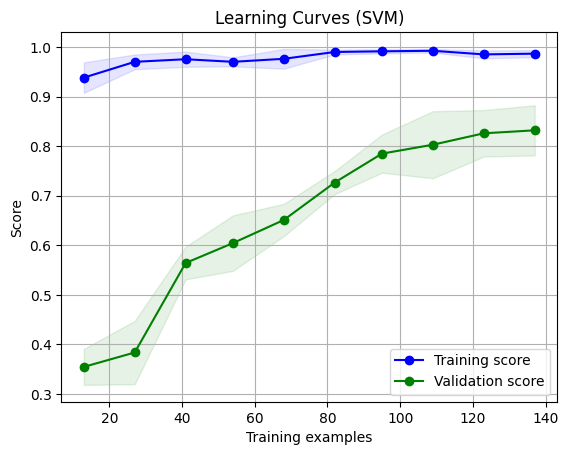

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    estimator=svm_model,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure()
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, val_mean, 'o-', color='green', label='Validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='green', alpha=0.1)

plt.title('Learning Curves (SVM)')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()


## Confusion Matrix


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



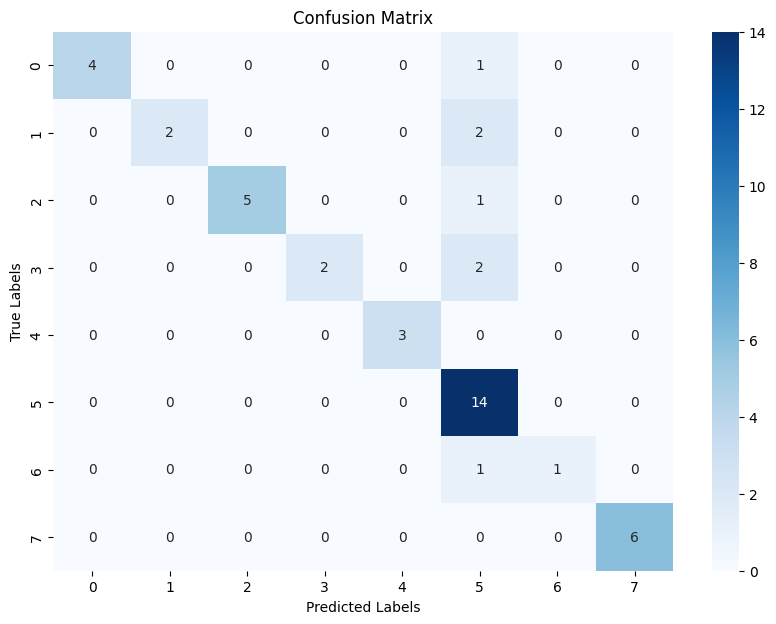

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Cross Val Accuracy Curves

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



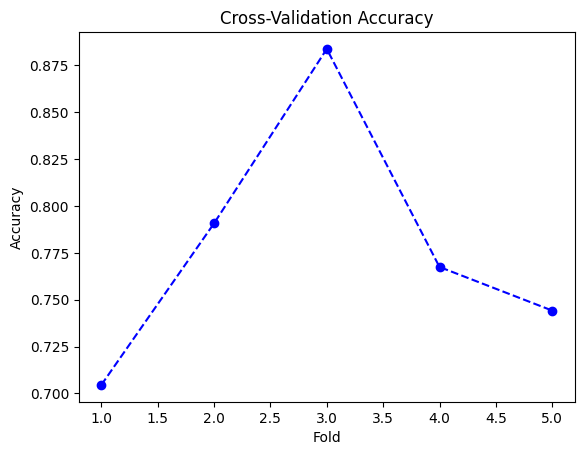

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy')

plt.plot(range(1, 6), scores, marker='o', linestyle='--', color='b')
plt.title('Cross-Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

## ROC Curves tiap Class


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



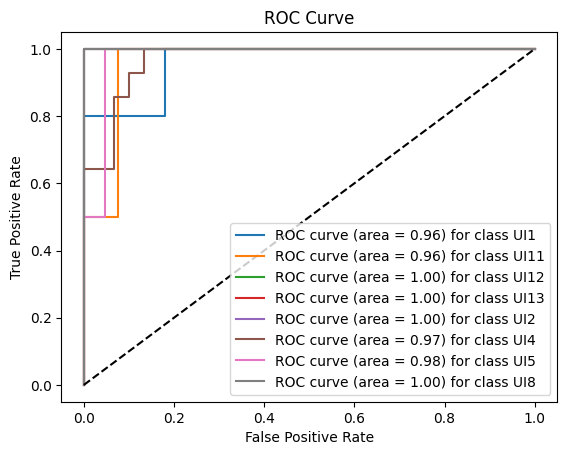

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=svm_model.classes_)
y_pred_prob = svm_model.predict_proba(X_test)

for i in range(len(svm_model.classes_)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f}) for class {svm_model.classes_[i]}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Precision-Recall Curve


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



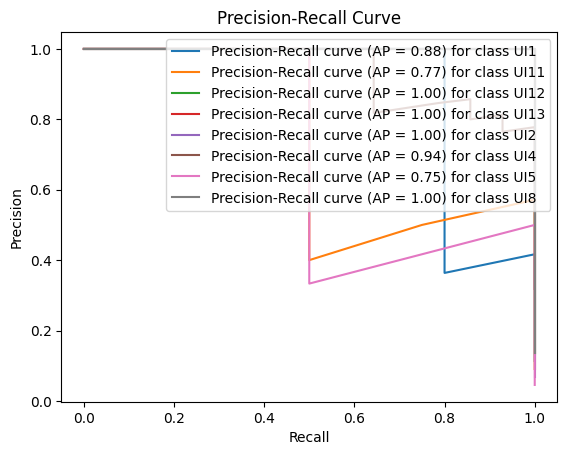

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Plot Precision-Recall curve untuk setiap kelas
for i in range(len(svm_model.classes_)):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
    avg_precision = average_precision_score(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(recall, precision, label=f'Precision-Recall curve (AP = {avg_precision:.2f}) for class {svm_model.classes_[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

## Heatmap of Top TF-IDF Features


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



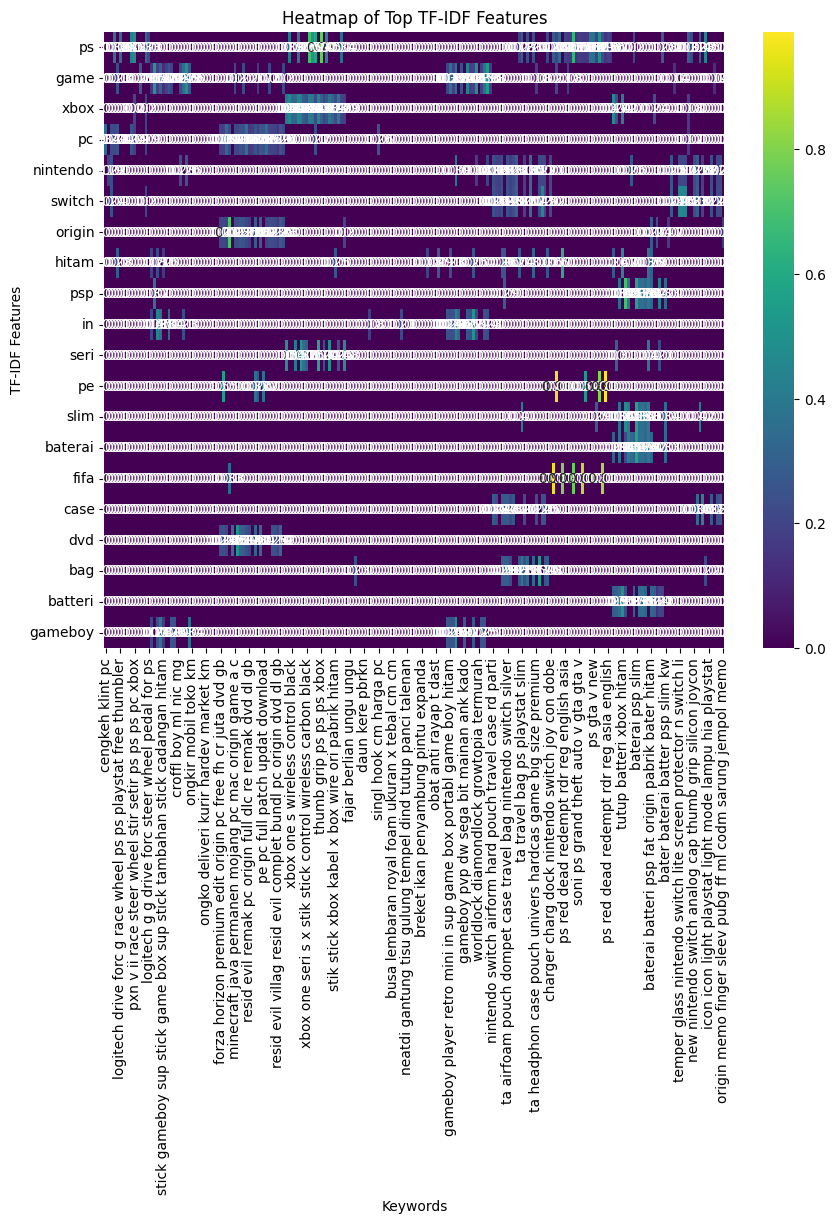

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


tfidf_df = pd.DataFrame(X.toarray(), columns=feature_names, index=df['CleanedProduct'])

# Heatmap 20 fitur teratas
# berdasarkan rata-rata skor TF-IDF
top_n_features = 20
mean_tfidf = tfidf_df.mean().sort_values(ascending=False).head(top_n_features)
heatmap_data = tfidf_df[mean_tfidf.index]

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data.T, cmap='viridis', annot=True)
plt.title('Heatmap of Top TF-IDF Features')
plt.xlabel('Keywords')
plt.ylabel('TF-IDF Features')
plt.show()

## K-Means Clustering of TF-IDF Features

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



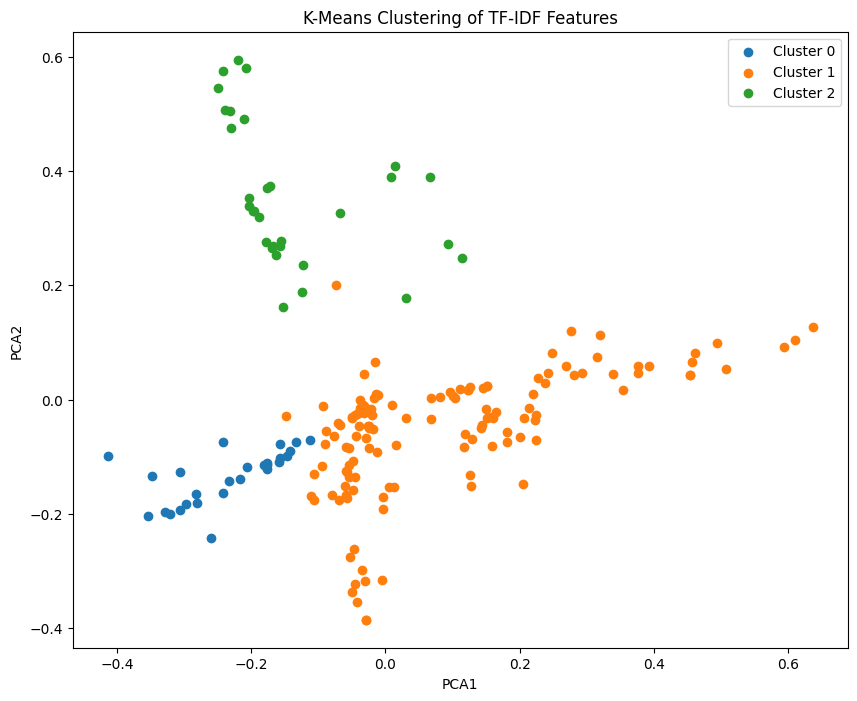

In [ ]:
from sklearn.cluster import KMeans

# Nentuin jumlah cluster (3 cluster)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(X)

df['Cluster'] = kmeans.labels_

# Plotting hasil clustering using PCA untuk reduksi dimensi
plt.figure(figsize=(10, 8))
for cluster in range(num_clusters):
    indices = kmeans.labels_ == cluster
    plt.scatter(pca_result[indices, 0], pca_result[indices, 1], label=f'Cluster {cluster}')
plt.title('K-Means Clustering of TF-IDF Features')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

## PCA of TF-IDF Features

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



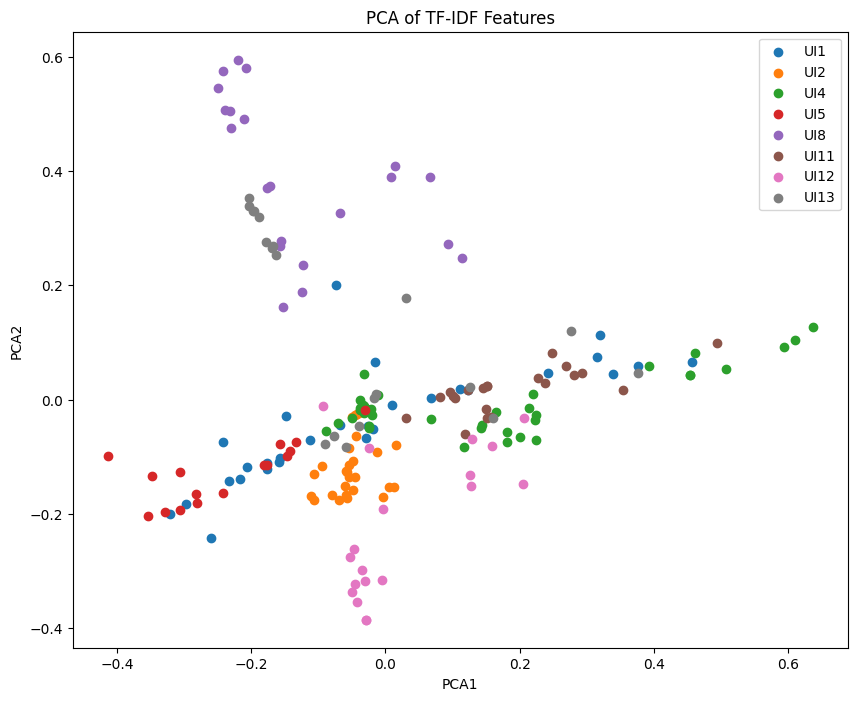

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Melakukan PCA untuk mereduksi dimensi menjadi 2 dimensi
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X.toarray())

pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['Class'] = y.values

# Plotting hasil PCA
plt.figure(figsize=(10, 8))
for class_label in pca_df['Class'].unique():
    indices = pca_df['Class'] == class_label
    plt.scatter(pca_df.loc[indices, 'PCA1'], pca_df.loc[indices, 'PCA2'], label=class_label)
plt.title('PCA of TF-IDF Features')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()